In [39]:
#  here we learn how to solve overfitting problem by regularization tech.
    

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
x,y = make_moons(100,noise=0.25 ,random_state =2)

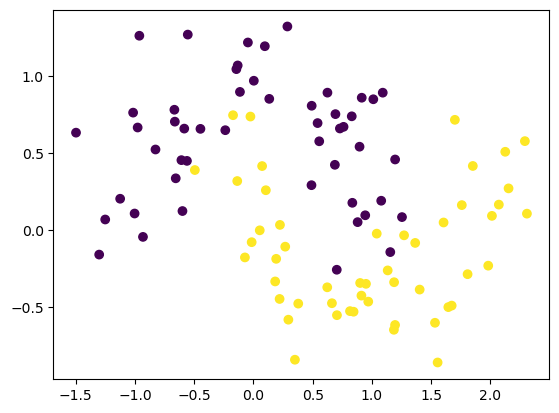

In [7]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [8]:
model1 = Sequential()
model1.add(Dense(128,input_dim=2,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation ='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
adam =Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history= model1.fit(x,y,epochs=2000,validation_split=0.2,verbose=0)

In [11]:
# yaha epochs 2000 islie dia h taki model overfit ho jaye

9600/9600 [==============================] - 15s 2ms/step


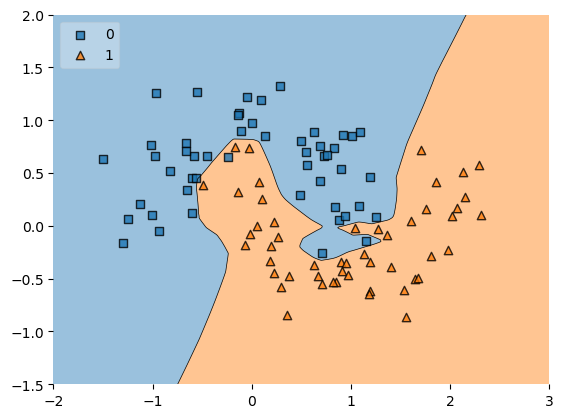

In [12]:
plot_decision_regions(x,y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

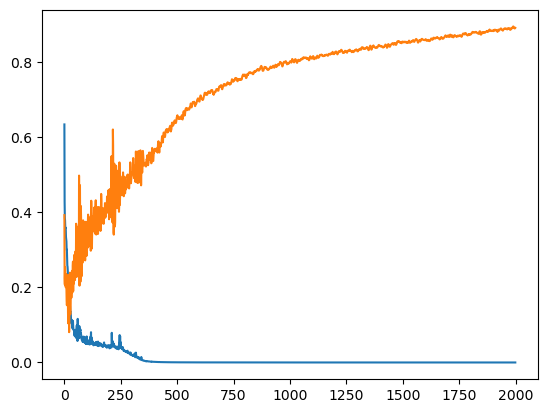

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
# now we write the code with regularization , mathod =l2

In [18]:
model2 =Sequential()

model2.add(Dense(128,input_dim=2, activation ='relu',kernel_regularizer =tensorflow.keras.regularizers.l2(0.5)))
model2.add(Dense(128,activation= 'relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.3)))
model2.add(Dense(1,activation ='sigmoid'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
#  remaining part of cod eis sama as previous 

In [19]:
adam=Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history2 = model2.fit(x,y,epochs=2000,validation_split=0.2 ,verbose=0)

9600/9600 [==============================] - 16s 2ms/step


<module 'matplotlib.pyplot' from 'C:\\Users\\Jarvis\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

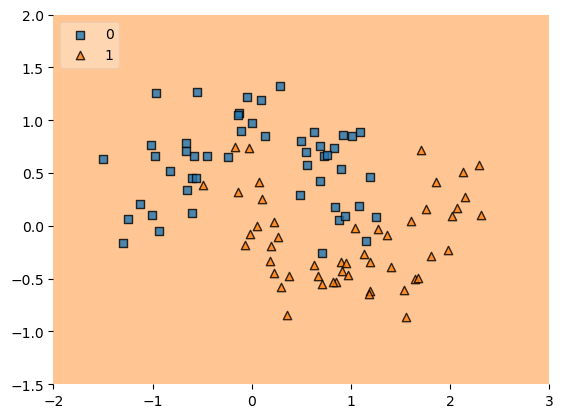

In [21]:
plot_decision_regions(x,y.astype('int'),clf=model2 ,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt

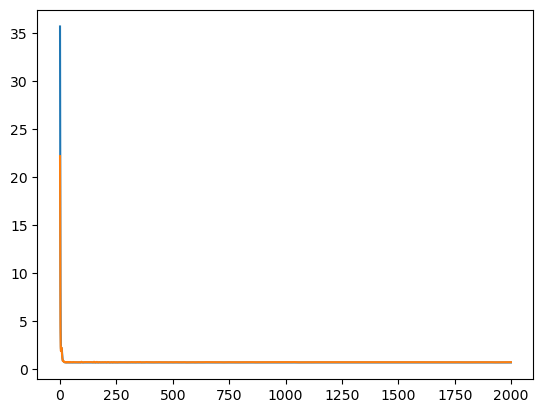

In [22]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])


In [23]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)


<Axes: >

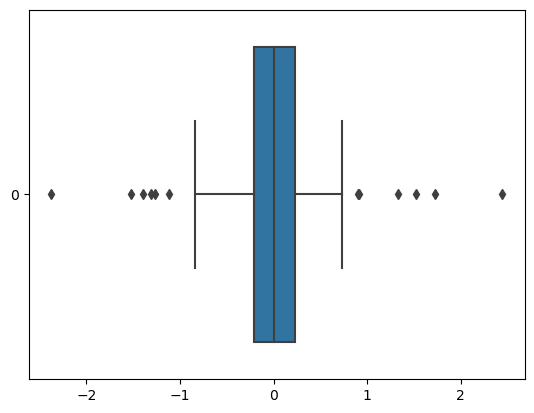

In [27]:
sns.boxplot(model1_weight_layer1 ,orient='h')
# orient = h    => mean print box plot in horizontal

<Axes: >

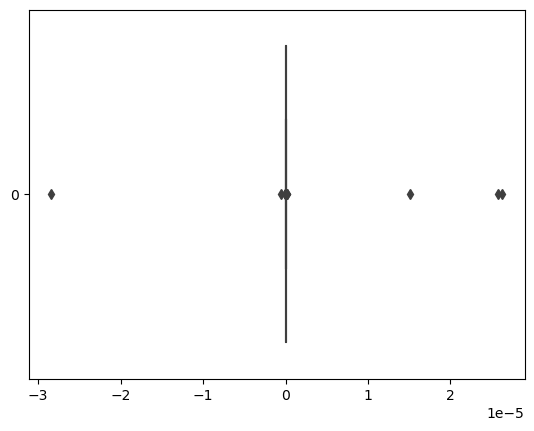

In [29]:
sns.boxplot(model2_weight_layer1,orient='h')

In [31]:
model1_weight_layer1.min()

-2.376139

In [32]:
model2_weight_layer1.min()

-2.8420307e-05

C:\Users\Jarvis\AppData\Local\Temp\ipykernel_8124\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\Jarvis\AppData\Local\Temp\ipykernel_8124\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

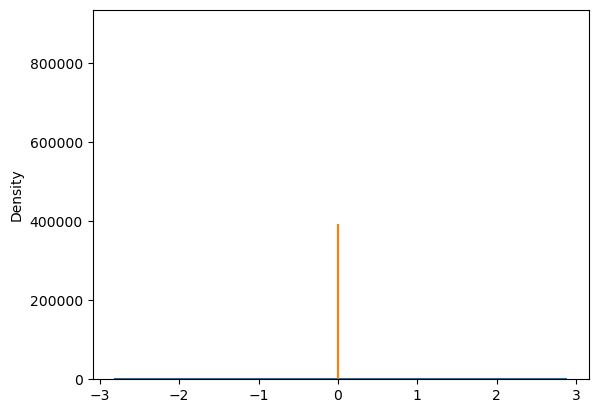

In [33]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [34]:
model1.get_weights()[0].reshape(256)

array([ 3.06805253e-01,  2.72416711e-01,  1.66258752e-01, -5.03212735e-02,
        2.52390236e-01, -8.14785424e-04,  3.29999328e-01, -3.44173834e-02,
       -5.91106415e-01, -3.23764309e-02,  2.77166545e-01,  3.68899524e-01,
        3.38202417e-01,  2.75470227e-01, -4.21904862e-01,  2.00121567e-01,
       -3.53553355e-01, -5.47403872e-01,  1.85867980e-01, -3.83149832e-01,
       -1.29985437e-01, -4.61782753e-01,  1.51185930e-01, -2.40075305e-01,
       -4.46554929e-01,  6.53790161e-02, -4.37138826e-01, -4.72457647e-01,
        1.69524193e-01, -6.73745036e-01,  2.07320601e-01, -4.72272545e-01,
       -2.68905133e-01,  2.39964545e-01, -1.09409168e-01, -5.33794582e-01,
       -1.34125939e-02, -6.92605525e-02,  5.70230372e-02, -1.89341411e-01,
       -6.12923130e-02, -5.08774877e-01,  1.74126223e-01, -4.60128635e-01,
        3.33144873e-01, -4.35502648e-01,  3.14529419e-01, -2.23846585e-01,
       -5.92370272e-01, -6.55805096e-02,  2.83219367e-01, -1.30339101e-01,
        2.95130978e-03, -

In [38]:
# so we =can see that values of weights is minimize 